# Sheet9 Leonhard Moske


## Exercise 25

density matrix definition:
$\rho = \ket{\psi}\bra{\psi} = \sum_{i_a,i_b,j_a,j_b} \ket{i_a , i_b}\bra{j_a,j_b}\bra{i_a , i_b}\ket{\psi}\bra{\psi}\ket{j_a,j_b}$

then the reduced density matrix is:
$\rho_a = \mathrm{Tr}_b(\rho) = \sum_{i_a,i_b,j_a} \ket{i_a }\bra{j_a}\bra{i_a , i_b}\ket{\psi}\bra{\psi}\ket{j_a,i_b}$

The entanglement entropy is defined as:
$S = - \mathrm{Tr}(\rho_a \ln(\rho_a))$

we first see that this calculation basis independent since for a basis transformation $\rho_a ' = U^{-1} \rho_a U$ the entropy stays the same:

$S' = - \mathrm{Tr}(\rho_a' \ln(\rho_a')) = S = - \mathrm{Tr}(U^{-1}\rho_a U U^{-1} \ln(\rho_a) U)$

with the trace being cyclic:

$ = - \mathrm{Tr}(\rho_a \ln(\rho_a)) = S$

We now insert the entaglement entropy:

$S = -\mathrm{Tr}( \sum_{i_b}\bra{i_a , i_b}\ket{\psi}\bra{\psi}\ket{i_a,i_b} \ln( \sum_{i_b} \bra{i_a , i_b}\ket{\psi}\bra{\psi}\ket{i_a,i_b}))$

We then can identitfy $T = \bra{\psi}\ket{i_a,i_b}$ and with the sum over $i_b$ we get a matrix product of $T$ and its adjoint $T^{*}$

$S =  -\mathrm{Tr}( T^{*}T \ln( T^{*}T))$

since we can choose the basis independent, we can choose the eigenbasis of $T^{*}T$, then $s_i$ are the singular values of $\bra{\psi}\ket{i_a,i_b}$

$S = -\mathrm{Tr}( s_i^2 \ln( s_i^2))$

In [1]:
import numpy as np
import itertools as it
import sympy

def genBasis(L, s): #L number of spins, s total spin
    posSpins = np.linspace(-s, s, int((2*s+1)), dtype = float)#generate List of all possible z projections
    #print("possible Spins ", posSpins)
    tmp = it.product(posSpins, repeat = L) # generate object that itterates over all combinations
    return np.asarray([i for i in tmp]) # assemble the list

def Splus(oldcoef, state, site, s): # site counted from 0 , passed with copy
                        # return new coefficient and new state 
    if (state[site] >= s): # if state is s the operator will return 0
        return 0, np.zeros(len(state))
    coef = np.sqrt(s*(s+1) - state[site] * (state[site] + 1)) #calculate new coef
    state[site] = state[site] + 1 # update spin state
    return coef*oldcoef, state 

def Sminus(oldcoef, state, site, s): # analog to Splus
    if (state[site] <= -s ):
        return 0, np.zeros(len(state))
    coef = np.sqrt(s*(s+1) - state[site] * (state[site] - 1))
    state[site] = state[site] - 1
    return coef*oldcoef, state 

def Sz(coef, state, site): 
    return state[site]*coef, state

def HeisenbergHamiltonian(J, statei, L, statej, s):
    H = 0
    for i in range(L-1): #apply the operators to every site until L-1
        coef1, state1 = Splus(*Sminus(1, np.copy(statei), i+1, s), i, s)
        coef2, state2 = Sminus(*Splus(1, np.copy(statei), i+1, s), i, s)
        coef3, state3 = Sz(*Sz(1, np.copy(statei), i+1), i)
        if np.array_equal(state1, statej): #compare if (<i|H)|j> is 0 for every term
            H += coef1*J*0.5
        if np.array_equal(state2, statej):
            H += coef2*J*0.5
        if np.array_equal(state3, statej):
            H += coef3 * J
    return H

def HeisenbergHamiltonian(J, statei, L, statej, s):
    H = 0
    for i in range(L-1): #apply the operators to every site until L-1
        coef1, state1 = Splus(*Sminus(1, np.copy(statei), i+1, s), i, s)
        coef2, state2 = Sminus(*Splus(1, np.copy(statei), i+1, s), i, s)
        coef3, state3 = Sz(*Sz(1, np.copy(statei), i+1), i)
        if np.array_equal(state1, statej): #compare if (<i|H)|j> is 0 for every term
            H += coef1*J*0.5
        if np.array_equal(state2, statej):
            H += coef2*J*0.5
        if np.array_equal(state3, statej):
            H += coef3 * J
    return H

def calcMatrix(Basis, J, L, s):# calculate the basis by calculating the hamiltonian with all combination from the basis
    Matrix = np.empty((len(Basis),len(Basis)))
    for i, j in it.product(range(len(Basis)), repeat=2):
        Matrix[i,j] = HeisenbergHamiltonian(J, Basis[i], L, Basis[j], s)
    return Matrix

In [2]:

def genBasis(L, s): #L number of spins, s total spin
    posSpins = np.linspace(-s, s, int((2*s+1)), dtype = float)#generate List of all possible z projections
    #print("possible Spins ", posSpins)
    tmp = it.product(posSpins, repeat = L) # generate object that itterates over all combinations
    return np.asarray([i for i in tmp]) # assemble the list

def Splus(oldcoef, state, site): # site counted from 0 , passed with copy
                        # return new coefficient and new state 
    if (state[site] == 0.5): #s): # if state is s the operator will return 0
        return 0, np.zeros(L)
    # coef = 1  #s = 1/2 #coef = np.sqrt(s*(s+1) - state[site] * (state[site] + 1)) #calculate new coef
    state[site] = 0.5 #state[site] + 1 # update spin state
    return oldcoef, state 

def Sminus(oldcoef, state, site): # analog to Splus
    if (state[site] == -0.5): # -s ):
        return 0, np.zeros(L)
    # coef = 1 #coef = np.sqrt(s*(s+1) - state[site] * (state[site] - 1))
    state[site] = -0.5 # state[site] - 1
    return oldcoef, state #coef*oldcoef 

def Sz(coef, state, site): 
    return state[site]*coef, state

def Hamiltonian(J, statei, L, statej, s):
    H = 0
    # if (np.array_equal(statei, statej)): # is in HamiltonianDiag
    #     for i in range(L):
    #         H += statei[i]*statei[(i+1)%L] * J
            #H += Sz(*Sz(1, np.copy(statei), (i+1)%L), i)[0] * J
    for i in range(L): #apply the operators to every site until L-1
        coef1, state1 = Splus(*Sminus(1, np.copy(statei),(i+1)%L), i)
        coef2, state2 = Sminus(*Splus(1, np.copy(statei), (i+1)%L), i)
        #coef3, state3 = Sz(*Sz(1, np.copy(statei), i+1), i)
        if np.array_equal(state1, statej): #compare if (<i|H)|j> is 0 for every term
            H += coef1*J*0.5
        if np.array_equal(state2, statej):
            H += coef2*J*0.5
        #if np.array_equal(state3, statej):
        #    H += coef3 * J
    return H

def HamiltonianOpen(J, statei, L, statej, s):
    H = 0
    # if (np.array_equal(statei, statej)): # is in HamiltonianDiag
    #     for i in range(L):
    #         H += statei[i]*statei[(i+1)%L] * J
            #H += Sz(*Sz(1, np.copy(statei), (i+1)%L), i)[0] * J
    for i in range(L-1): #apply the operators to every site until L-1
        coef1, state1 = Splus(*Sminus(1, np.copy(statei),(i+1)%L), i)
        coef2, state2 = Sminus(*Splus(1, np.copy(statei), (i+1)%L), i)
        #coef3, state3 = Sz(*Sz(1, np.copy(statei), i+1), i)
        if np.array_equal(state1, statej): #compare if (<i|H)|j> is 0 for every term
            H += coef1*J*0.5
        if np.array_equal(state2, statej):
            H += coef2*J*0.5
        #if np.array_equal(state3, statej):
        #    H += coef3 * J
    return H

def HamiltonianDiag(J, statei, L):
    H = 0
    for i in range(L):
        H += statei[i]*statei[(i+1)%L] * J
    return H

def HamiltonianDiagOpen(J, statei, L):
    H = 0
    for i in range(L-1):
        H += statei[i]*statei[(i+1)%L] * J
    return H


def calcMatrix(Basis, J, L, s):# calculate the basis by calculating the hamiltonian with all combination from the basis
    Matrix = np.empty((len(Basis),len(Basis)))
    for i in range(len(Basis)):
        Matrix[i,i] = HamiltonianDiag(J, Basis[i], L)
    for i, j in it.permutations(range(len(Basis)), 2):
        Matrix[i,j] = Hamiltonian(J, Basis[i], L, Basis[j], s)
    return Matrix 

def calcMatrixOpen(Basis, J, L, s):# calculate the basis by calculating the hamiltonian with all combination from the basis
    Matrix = np.empty((len(Basis),len(Basis)))
    for i in range(len(Basis)):
        Matrix[i,i] = HamiltonianDiagOpen(J, Basis[i], L)
    for i, j in it.permutations(range(len(Basis)), 2):
        Matrix[i,j] = HamiltonianOpen(J, Basis[i], L, Basis[j], s)
    return Matrix 

def hFields(statei, L, h):
    return np.sum(np.multiply(statei,h))

def calcMatrixOpenWField(Basis, J, L, s, h):# calculate the basis by calculating the hamiltonian with all combination from the basis
    Matrix = np.empty((len(Basis),len(Basis)))
    for i in range(len(Basis)):
        Matrix[i,i] = HamiltonianDiagOpen(J, Basis[i], L) + hFields(Basis[i], L, h)
    for i, j in it.permutations(range(len(Basis)), 2):
        Matrix[i,j] = HamiltonianOpen(J, Basis[i], L, Basis[j], s)  
    return Matrix 

In [11]:
L = 12
s = 0.5
J = 1

# calcMatrix(genBasis(L,s), J, L, s)

In [12]:
h = np.random.uniform(low = -0.5,high=0.5,size= L)

ham = calcMatrixOpenWField(genBasis(L,s),J,L,s,h)

1024


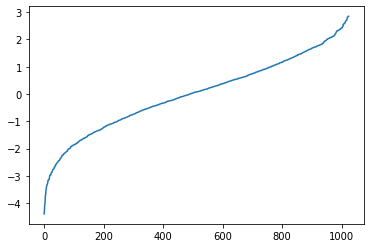

In [ ]:
import matplotlib.pyplot as plt
w, v = np.linalg.eig(ham)

print(len(w))
plt.plot(sorted(w))

## Exercise 26

In [ ]:
import itertools as it

def projection(lA, lB, state):
    return np.reshape(state, (2**int(lB),2**int(lA)))


def entropy(state, lA, lB):
    T = projection(lA, lB, state)
    # print(state)
    # print(T)
    TTev = np.abs(np.linalg.eigvals(np.matmul(np.transpose(np.matrix.conjugate(T)), T))) # conjugate not nessec since real
    TTev = np.delete(TTev, TTev < 10E-7)
    return - np.sum(np.multiply(TTev, np.log(TTev)))

In [ ]:
# print(v[2])
# print(projection(L/2, L/2, v[2]))
print(entropy(v[1], L/2, L/2))

1.6825444454518625


In [ ]:
entro = np.array([entropy(eState, L/2, L/2) for eState in v])

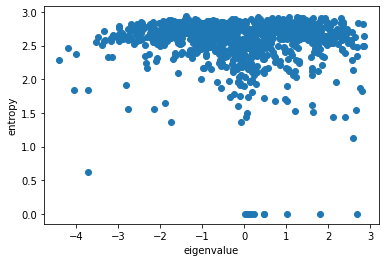

In [ ]:
import matplotlib.pyplot as plt

minimalEntro = np.argmin(entro)

plt.scatter(w, entro)
plt.ylabel("entropy")
plt.xlabel("eigenvalue")
plt.show()

## Exercise 27

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.87984706e-30
  0.00000000e+00  0.00000000e+00]


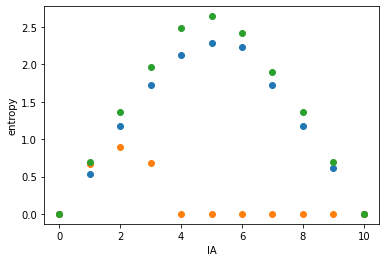

In [ ]:
lowestEv = v[np.argmin(w)]
zeroEv = v[minimalEntro]# v[np.argmin(np.absolute(w)) +2] #nice trick to get index of closest value
maxEv = v[np.argmax(w)]

print(lowestEv)

minEntro = []
zeroEntro = []
maxEntro = []

for i in range(0,int(L+1)):
    minEntro.append(entropy(lowestEv,i,L-i))
    zeroEntro.append(entropy(zeroEv, i, L-i))
    maxEntro.append(entropy(maxEv, i, L-i))
    
xrange = [i for i in range(0,int(L+1))]

plt.scatter(xrange, minEntro)
plt.scatter(xrange, zeroEntro)
plt.scatter(xrange, maxEntro)
plt.xlabel("lA")
plt.ylabel("entropy")
plt.show()